# Proyek Machine Learning Prediksi Diagnosa Penyakit Diabetes

Sulistyo Chandrianto

# Project Overview

Project machine learning ini dibuat untuk membantu dalam diagnosa penyakit diabetes berdasarkan rekam medis dari pasien.

# Pemahaman Bisnis

## Permasalahan

- Bagaimana membuat model yang dapat memprediksi seorang pasien terkena penyakit diabetes berdasarkan rekam medis ?
- Apa model machine learning yang tepat dan akurat yang dapat digunakan dalam prediksi seseorang terkena penyakit diabetes ?

## Tujuan

- Membuat model machine learning yang dapat memprediksi seorang pasien terkena penyakit diabetes berdasarkan rekam medis.
- Memilih model machine learning yang tepat dan akurat dalam proses memprediksi apakah seorang pasien terkena penyakit diabetes atau tidak.

# Impor Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Impor Data

Dataset diambil dari [Kaggle Diabetes prediction dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset). Data didownload dan dimport ke google colab dengan nama 'diabetest_prediction_dataset.csv'.

In [2]:
file_name = 'diabetes_prediction_dataset.csv'
diabetes_datasets = pd.read_csv(file_name)

# Pemahaman Data

## Informasi Data

In [3]:
diabetes_datasets

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0
...,...,...,...,...,...,...,...,...,...
55041,Male,70.0,0.0,0.0,former,26.88,5.8,140.0,1.0
55042,Male,13.0,0.0,0.0,never,20.54,4.0,140.0,0.0
55043,Male,52.0,0.0,0.0,never,29.05,6.1,140.0,0.0
55044,Male,47.0,0.0,0.0,No Info,27.32,4.5,160.0,0.0


Dari tampilan data ditemukan informasi
- Jumlah data 100.000
- Jumlah kolom 9

In [4]:
diabetes_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55046 entries, 0 to 55045
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55046 non-null  object 
 1   age                  55046 non-null  float64
 2   hypertension         55045 non-null  float64
 3   heart_disease        55045 non-null  float64
 4   smoking_history      55045 non-null  object 
 5   bmi                  55045 non-null  float64
 6   HbA1c_level          55045 non-null  float64
 7   blood_glucose_level  55045 non-null  float64
 8   diabetes             55045 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.8+ MB


Terlihat dari informasi jumlah baris di setiap kolom tidak ada value yang hilang. Yang setiap kolom memiliki jumlah baris sebanyak 100.000.

Selain itu, terdapat 5 fitur categorical yaitu gender, smoking_history, hypertension, heart_desease dan diabetes.

> Khusus fitur  hypertension, heart_desease dan diabetes nilai 0 berarti tidak dan 1 berarti iya.

> Dengan diabetes sebagai target fitur.





In [5]:
# unique value fitur gender
diabetes_datasets['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [6]:
# unique value fitur smoking_history
diabetes_datasets['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current',
       nan], dtype=object)

## Eksplore Fitur Univariate

In [7]:
# List fitur berdasarkan bagian kategori dan numerik
categorical_features=['gender','smoking_history','hypertension','heart_disease']
numeric_features=['age','bmi','HbA1c_level','blood_glucose_level']

In [8]:
# buat df_numeric untuk memisahkan fitur hypertension dan heart_disease
df_numeric = diabetes_datasets.loc[:, ~diabetes_datasets.columns.isin(categorical_features)]

### Fitur Kategorical

#### Fitur gender

        jumlah sampel  persentase
Female          32297        58.7
Male            22739        41.3
Other              10         0.0


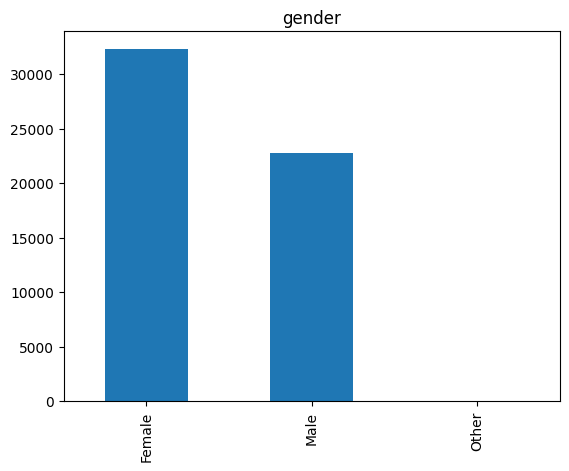

In [9]:
feature = categorical_features[0]
count = diabetes_datasets[feature].value_counts()
percent = 100*diabetes_datasets[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 3 kategori pada fitur gender yaitu Female, Male dan Other. Perbandingan presentase Female dan Male hampir sama yaitu 58% dan 41% dengan presentase Female lebih besar.

#### Fitur smoking_history

             jumlah sampel  persentase
No Info              19661        35.7
never                19359        35.2
former                5244         9.5
current               5101         9.3
not current           3513         6.4
ever                  2167         3.9


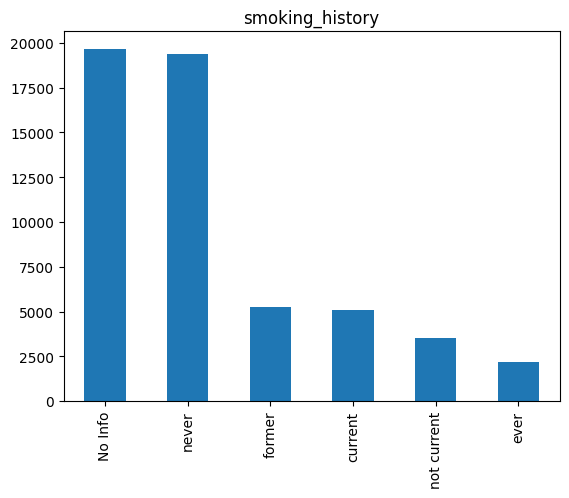

In [10]:
feature = categorical_features[1]
count = diabetes_datasets[feature].value_counts()
percent = 100*diabetes_datasets[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 6 kategori di fitur smoking_history, yaitu No Info, never, former, current, not current, ever. Dengan dominasi nilai kategori No Info dan never yang paling besar yaitu dengan presentase masing-masing 35%

### Fitur Numerik

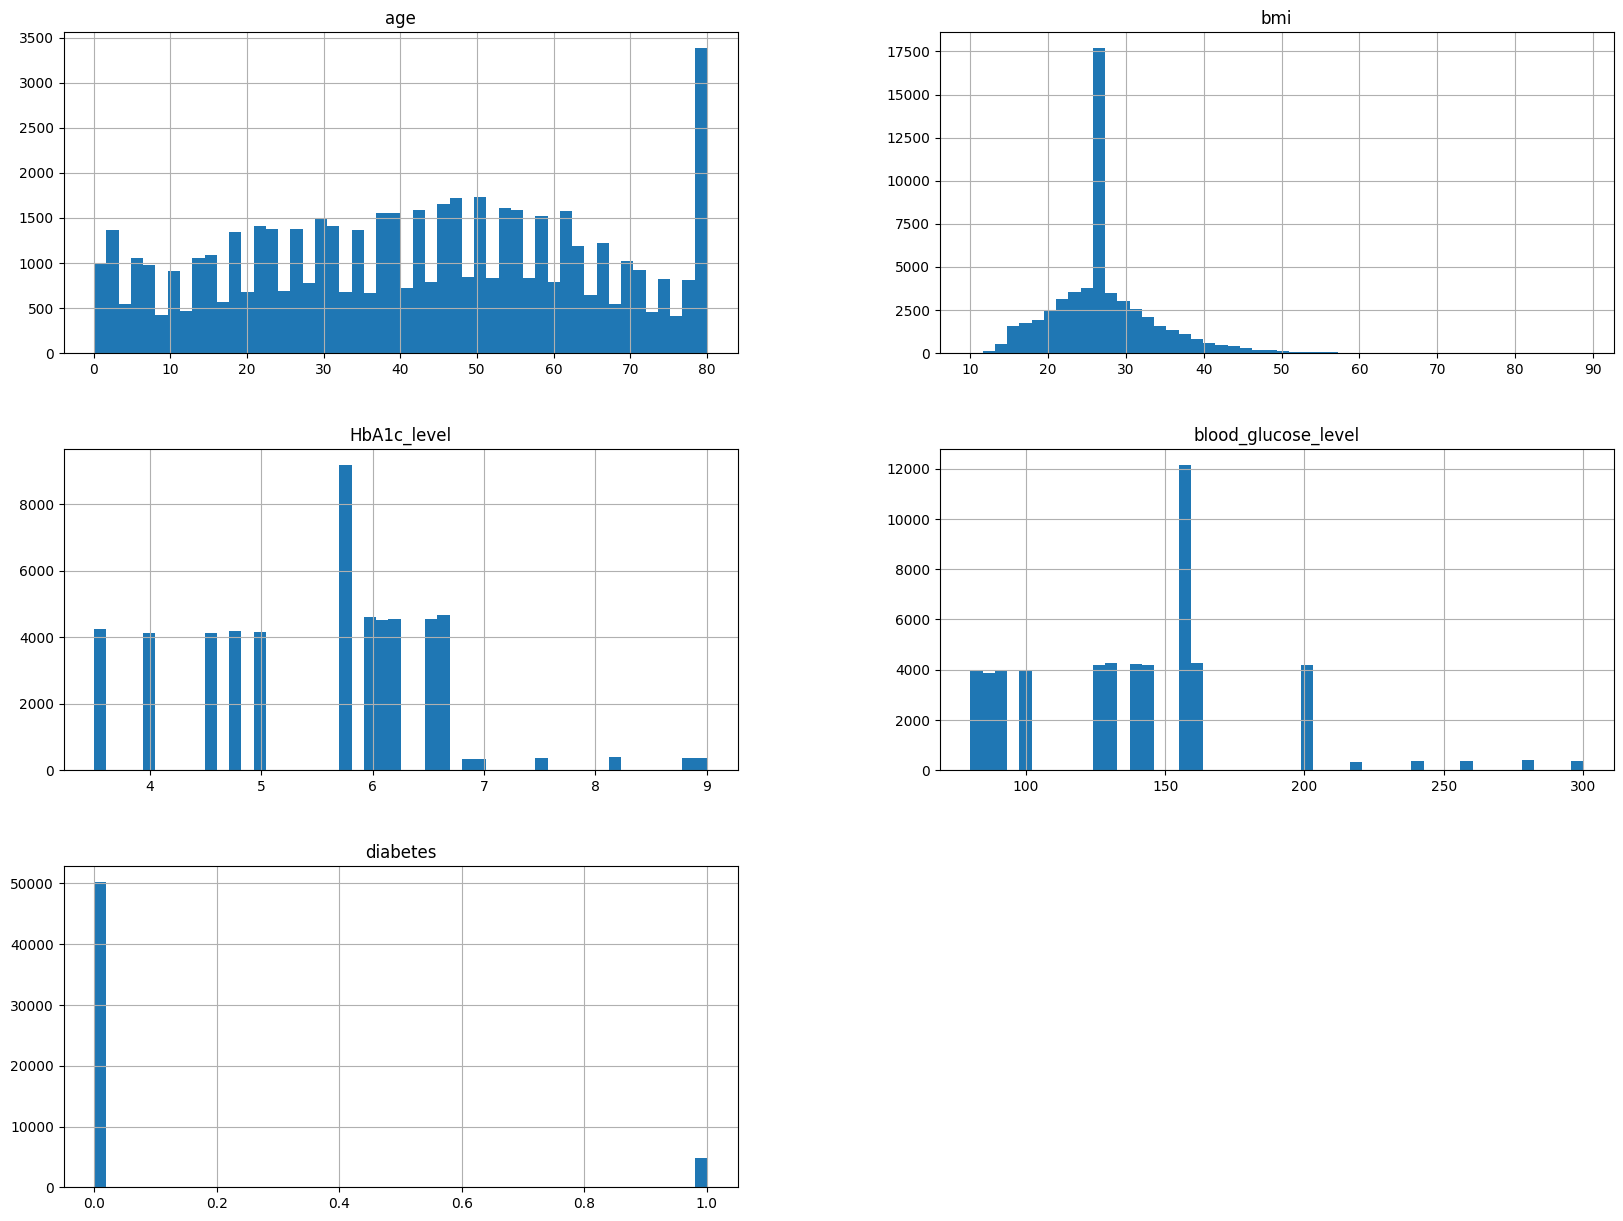

In [11]:
df_numeric.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram di atas ditemukan:
- Pasien berumur 80 tahun paling banyak

## Eksplore Fitur Multivariate

Mencari hubungan antara dua atau lebih fitur data

### Fitur Kategorical

In [12]:
categorical_features

['gender', 'smoking_history', 'hypertension', 'heart_disease']

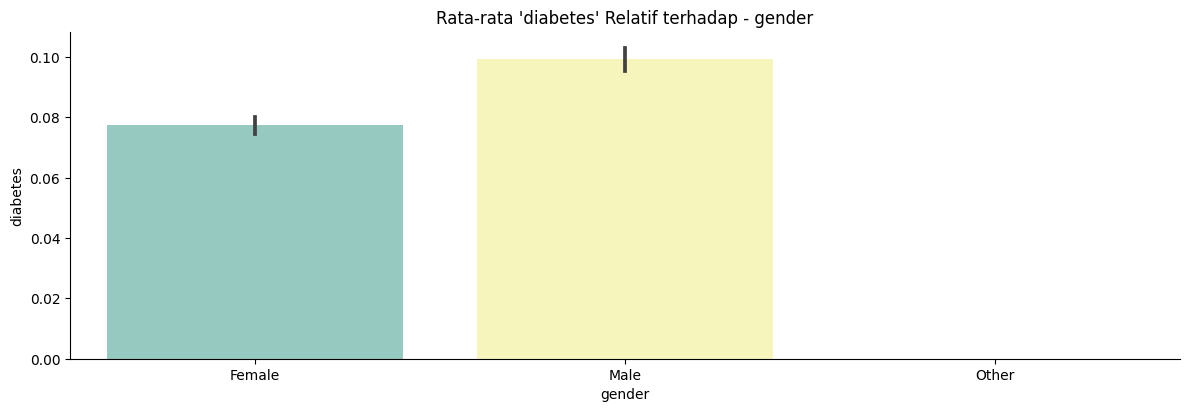

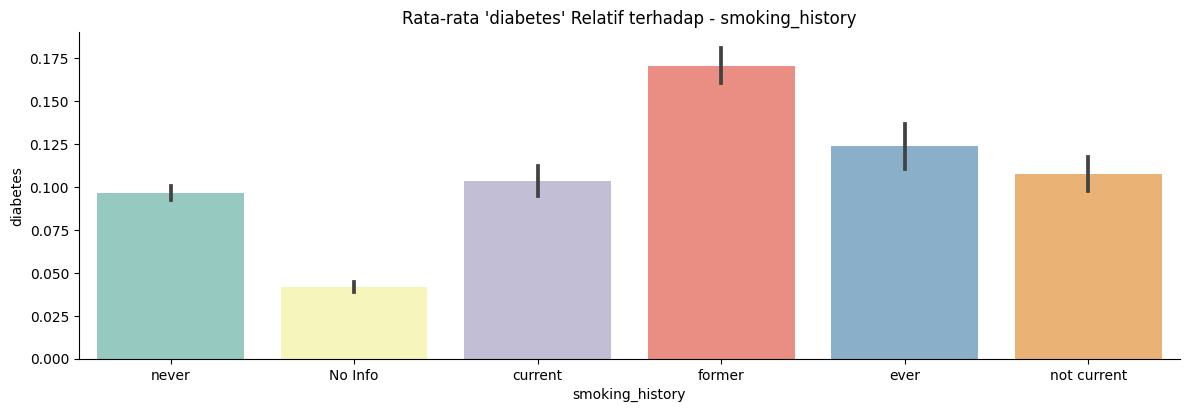

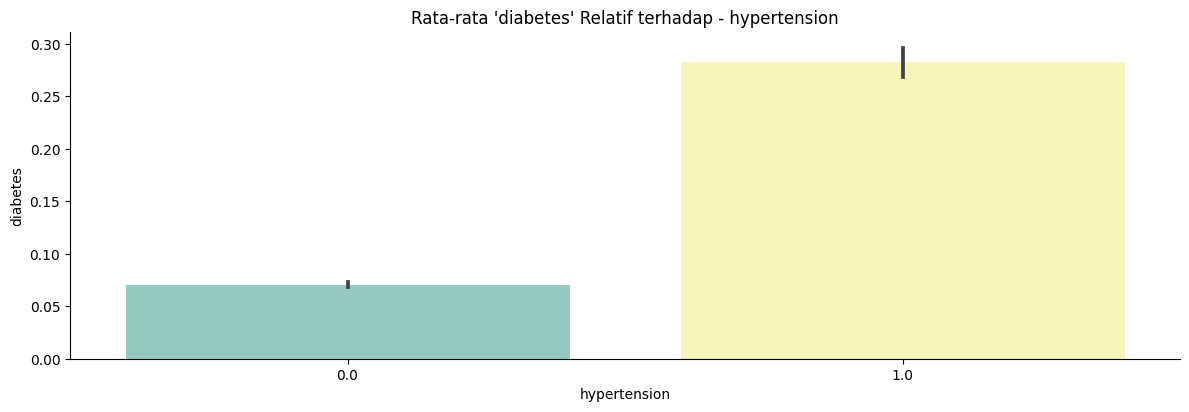

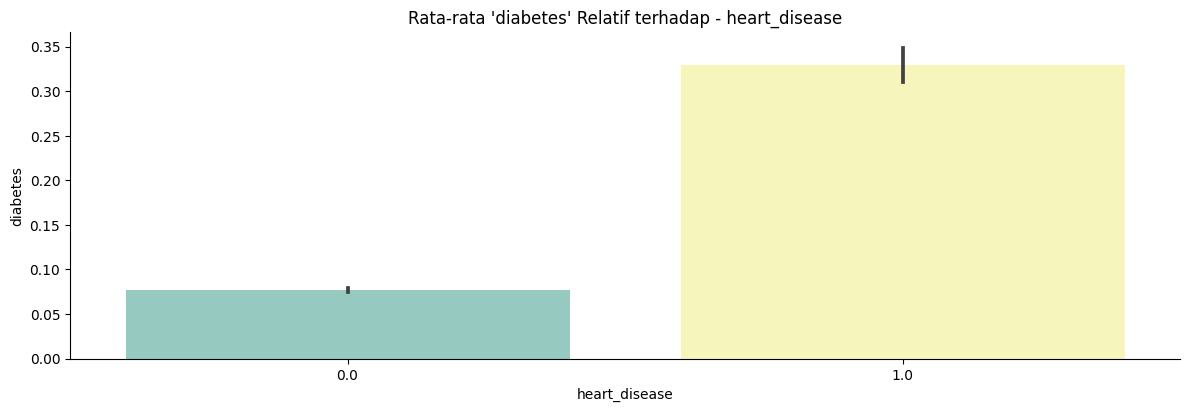

In [13]:
# plot hubungan categorical dengan fitur diabetes
for col in categorical_features:
  sns.catplot(x=col, y="diabetes", kind="bar", dodge=False, height = 4, aspect = 3,  data=diabetes_datasets, palette="Set3")
  plt.title("Rata-rata 'diabetes' Relatif terhadap - {}".format(col))

Dari hubungan fitur target diabetes dengan fitur kategorical, didapatkan bahwa :
- pengidap hipertensi memiliki rata-rata terkena penyakit diabetes lebih tinggi
- pengidap sakit jantung memiliki rata-rata terkena penyakit diabetes lebih tinggi
- fitur gender dan smoking_history berpengaruh sedikit ke fitur diabetes

### Fitur Numerik

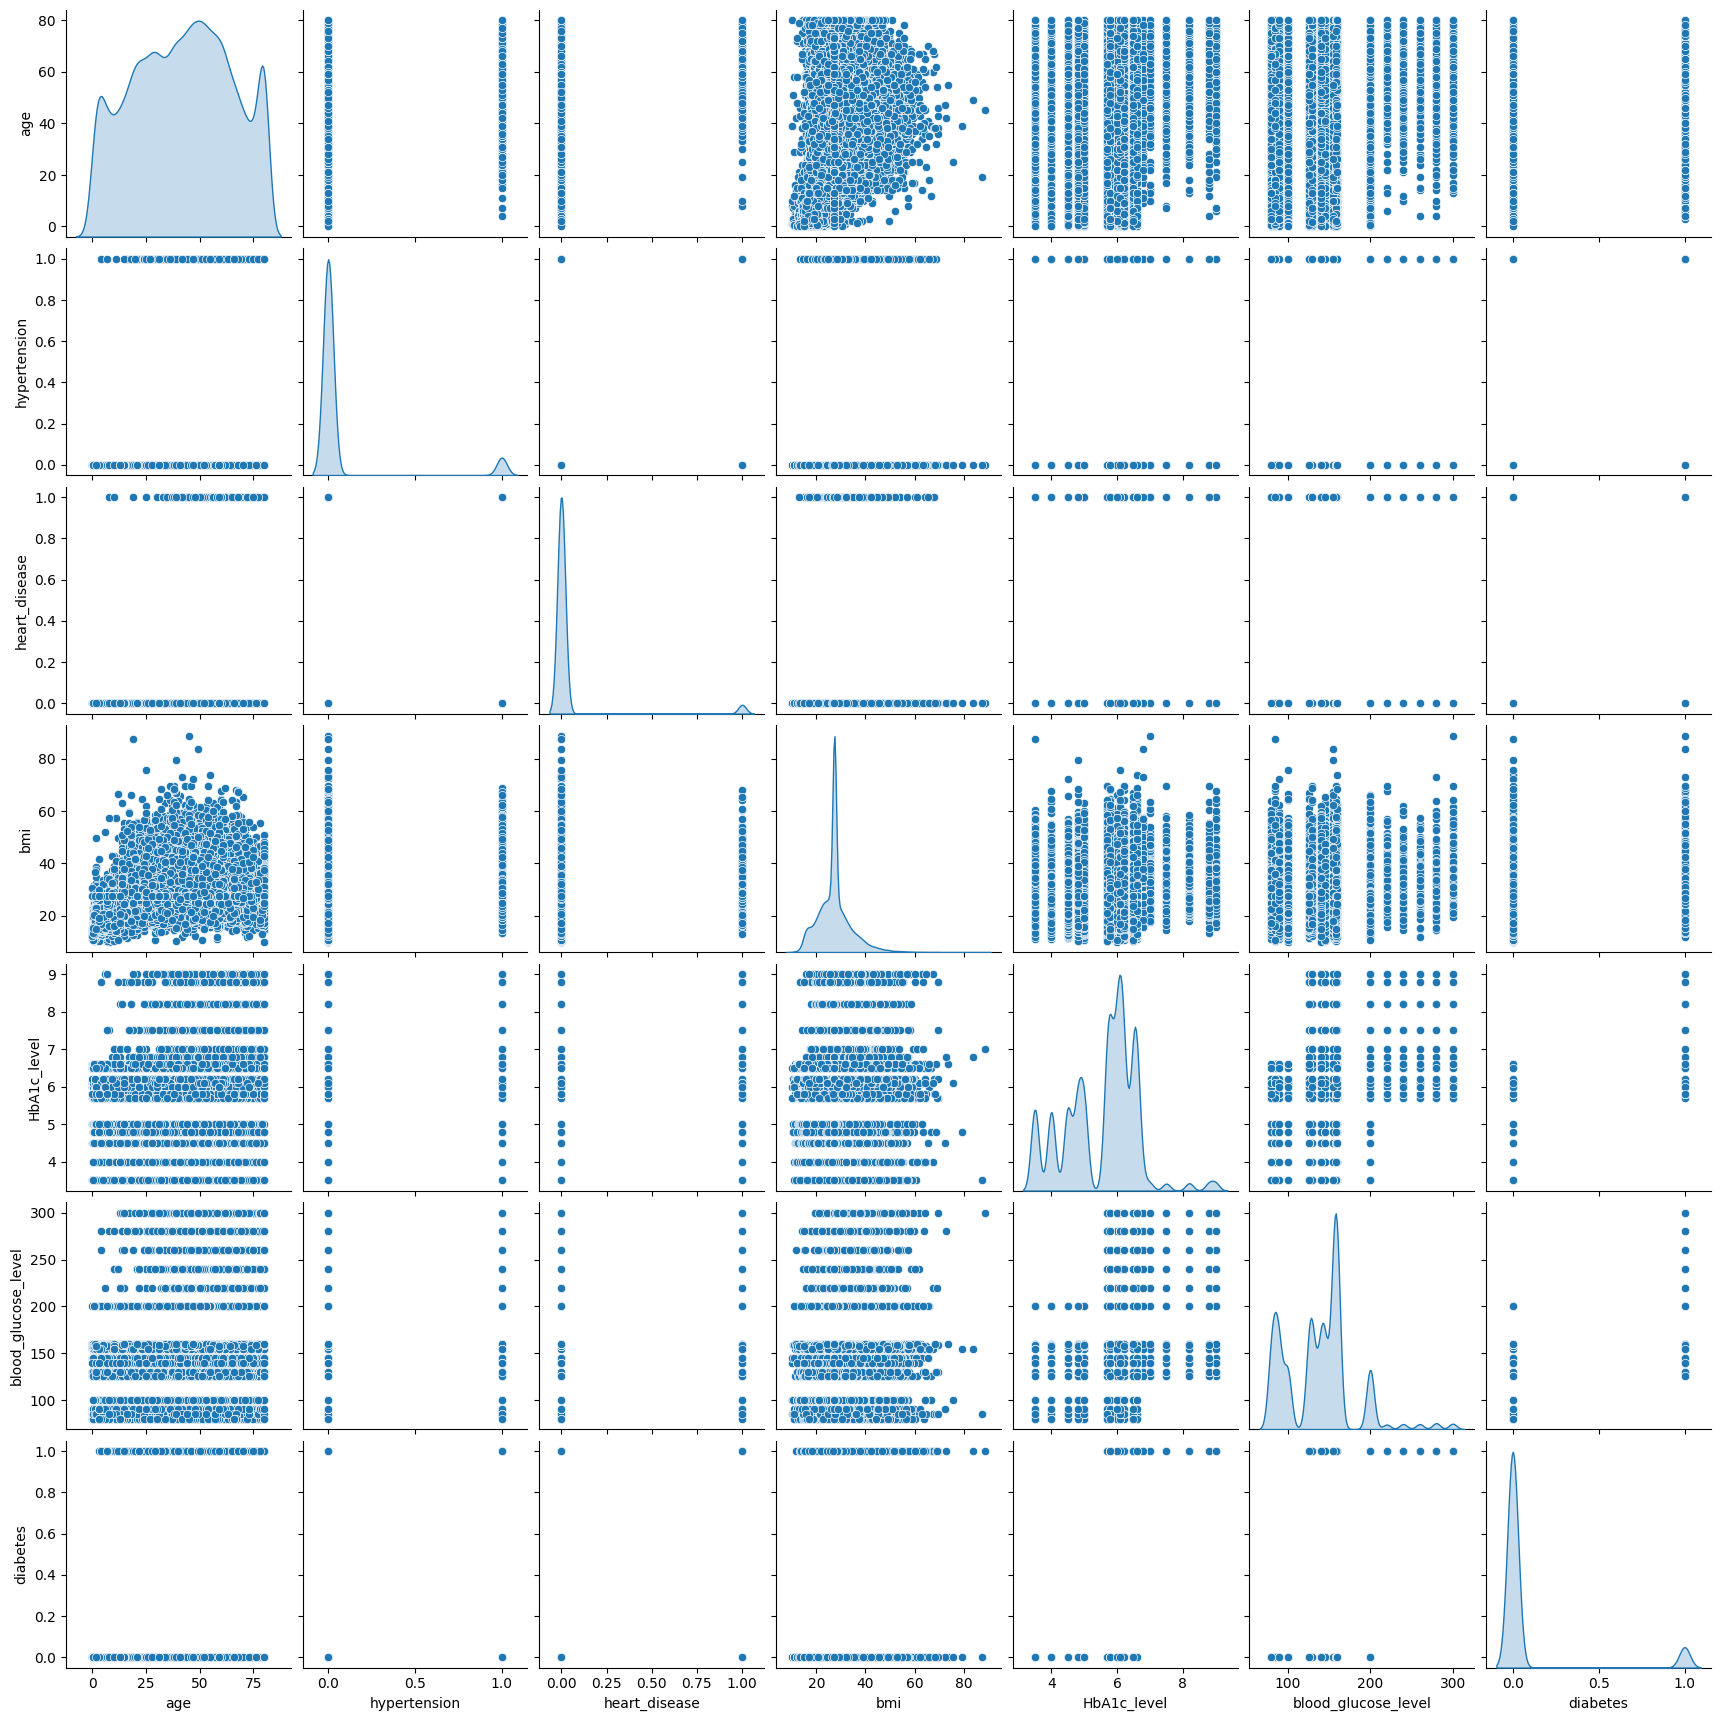

In [14]:
# Mengamati hubungan antar fitur numerik dengan pairplot()
sns.pairplot(diabetes_datasets, diag_kind = 'kde')

Dari pairplot diatas,pada fitur target diabetes ditemukan fitur **HbA1c_level** dan blood_glucose_level mempengaruhi fitur diabetes. Semakin tinggi nilai pada sumbu x semakin tinggi pula probabilitas pasien terkena penyakit diabetes (diabetes=1)

<Axes: >

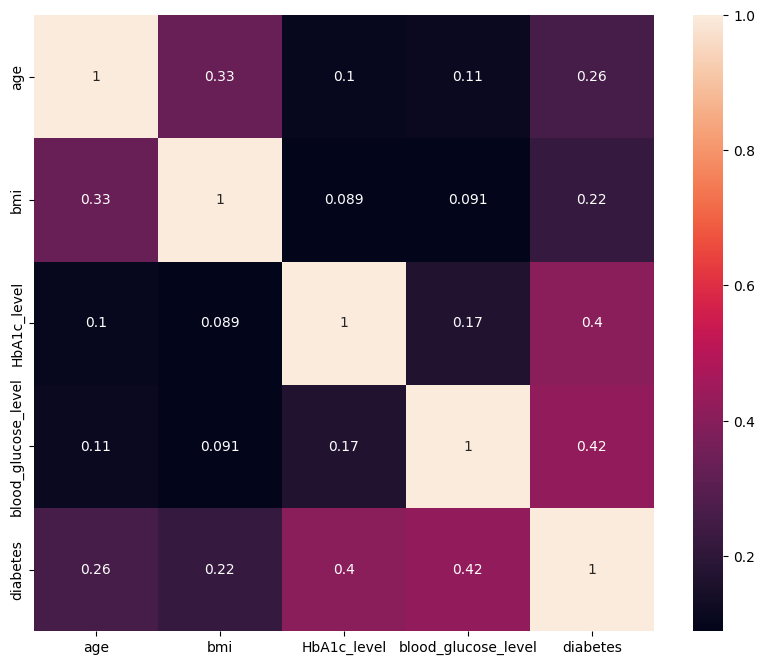

In [15]:
# Mengamati hubungan antar fitur numerik dengan heatmap

plt.figure(figsize = (10,8))
sns.heatmap(df_numeric.corr(), annot = True)

Dari heatmap diatas dapat disimpulkan korelasi **blood_glucose_level** dan **HbA1c_level** memiliki nilai korelasi yang cukup tinggi


> Hasil dari pairplot dan heatmap memiliki kesamaan yaitu fitur numerik yang berkorelasi tinggi dengan fitur target diabetes adalah **blood_glucose_level** dan **HbA1c_level**



# Persiapan Data

## Menangani Missing Value

In [16]:
# Deskripsi data
diabetes_datasets.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,55046.000000,55045.000000,55045.000000,55045.000000,55045.000000,55045.000000,55045.000000
mean,41.869806,0.074921,0.038895,27.331405,5.528188,137.928677,0.086475
std,22.493219,0.263265,0.193348,6.649507,1.071911,40.984804,0.281066
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.600000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


Nilai minimal di fitur age bukan 0 sehingga tidak perlu di periksa missing value lagi.

In [17]:
# Total data kosong di setiap kolom
diabetes_datasets.isna().sum()

gender                 0
age                    0
hypertension           1
heart_disease          1
smoking_history        1
bmi                    1
HbA1c_level            1
blood_glucose_level    1
diabetes               1
dtype: int64

Tidak ditemukan missing value.

## Menangani Outliers

Menggunakan teknik visualisasi data (boxplot) pada fitur numerik.

Fitur numerik yang akan di periksa adalah
- age
- bmi
- HbA1c_level
- blood_glucose_level

<Axes: xlabel='age'>

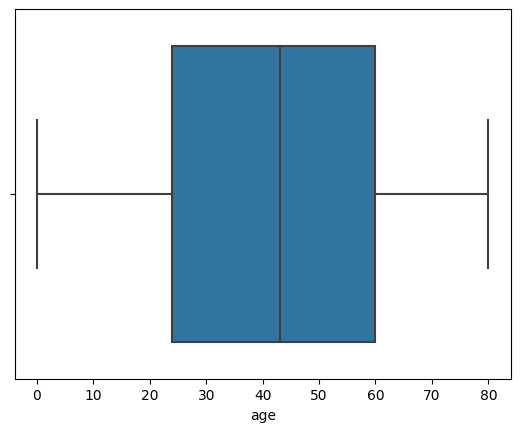

In [18]:
# fitur age
sns.boxplot(x=diabetes_datasets['age'])

<Axes: xlabel='bmi'>

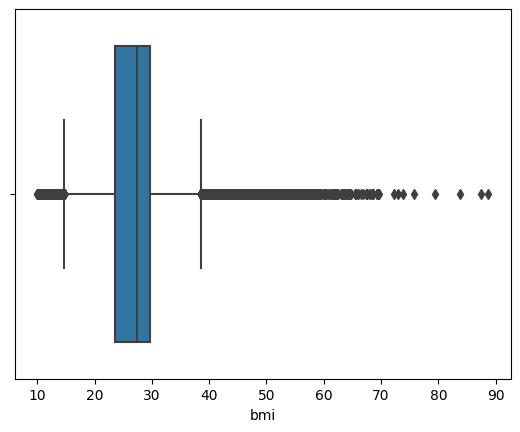

In [19]:
# fitur bmi
sns.boxplot(x=diabetes_datasets['bmi'])

<Axes: xlabel='HbA1c_level'>

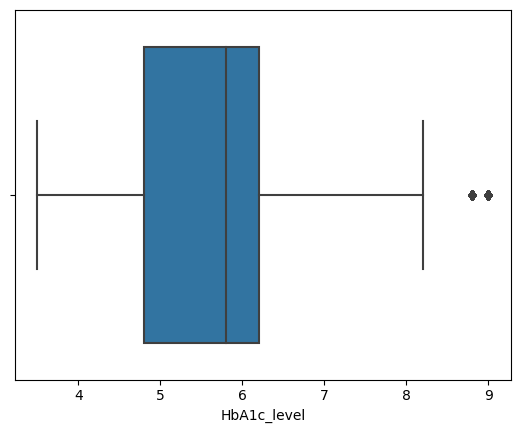

In [20]:
# fitur HbA1c_level
sns.boxplot(x=diabetes_datasets['HbA1c_level'])

<Axes: xlabel='blood_glucose_level'>

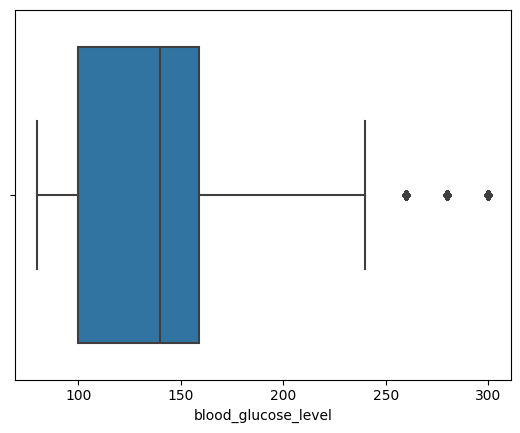

In [21]:
# fitur blood_glucose_level
sns.boxplot(x=diabetes_datasets['blood_glucose_level'])

In [22]:
# Menghapus dengan metode IQR

Q1 = diabetes_datasets.quantile(0.25)
Q3 = diabetes_datasets.quantile(0.75)
IQR=Q3-Q1
cleaned_df=diabetes_datasets[~((diabetes_datasets<(Q1-1.5*IQR))|(diabetes_datasets>(Q3+1.5*IQR))).any(axis=1)]

# Cek value di fitur target diabetes
cleaned_df['diabetes'].value_counts()

<ipython-input-22-0e45a10e067b>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diabetes_datasets.quantile(0.25)
<ipython-input-22-0e45a10e067b>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diabetes_datasets.quantile(0.75)
<ipython-input-22-0e45a10e067b>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cleaned_df=diabetes_datasets[~((diabetes_datasets<(Q1-1.5*IQR))|(diabetes_datasets>(Q3+1.5*IQR))).any(axis=1)]


0.0    43464
Name: diabetes, dtype: int64

Setelah menggunakan metode IQR ternyata nilai 1 di fitur 'diabetes' di hapus semua sehingga tidak dilakukan penghapusan outliers

In [23]:
diabetes_datasets

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0
...,...,...,...,...,...,...,...,...,...
55041,Male,70.0,0.0,0.0,former,26.88,5.8,140.0,1.0
55042,Male,13.0,0.0,0.0,never,20.54,4.0,140.0,0.0
55043,Male,52.0,0.0,0.0,never,29.05,6.1,140.0,0.0
55044,Male,47.0,0.0,0.0,No Info,27.32,4.5,160.0,0.0


## Melakukan Encoding Fitur Kategori

Menerapkan encoding ke fitur kategori dengan teknik OHE (*one-hot-encoding*)

In [24]:
diabetes_datasets = pd.concat([diabetes_datasets, pd.get_dummies(diabetes_datasets['gender'], prefix='gender')],axis=1)
diabetes_datasets = pd.concat([diabetes_datasets, pd.get_dummies(diabetes_datasets['smoking_history'], prefix='smoking_history')],axis=1)

In [25]:
diabetes_datasets.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0,1,0,0,0,0,0,0,1,0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0,1,0,0,1,0,0,0,0,0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0,0,1,0,0,0,0,0,1,0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0,1,0,0,0,1,0,0,0,0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0,0,1,0,0,1,0,0,0,0


In [26]:
diabetes_datasets.drop(['gender','smoking_history'], axis=1, inplace=True)

In [27]:
diabetes_datasets.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,1,0,0,0,0,0,0,1,0
1,54.0,0.0,0.0,27.32,6.6,80.0,0.0,1,0,0,1,0,0,0,0,0
2,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0,1,0,0,0,0,0,1,0
3,36.0,0.0,0.0,23.45,5.0,155.0,0.0,1,0,0,0,1,0,0,0,0
4,76.0,1.0,1.0,20.14,4.8,155.0,0.0,0,1,0,0,1,0,0,0,0


## Menangani Imbalance Dataset di Fitur Target

In [28]:
diabetes_datasets['diabetes'].value_counts()

0.0    50285
1.0     4760
Name: diabetes, dtype: int64

Dapat dilihat diatas bahwa perbandingan nilai di fitur target 'diabetes' sangat timpang yaitu 915:85 atau hampir 10:1

Maka dari itu dilakukan teknik Random Oversampling and Undersampling

In [29]:
# ambil tiap kategori
non_diabetic  = diabetes_datasets[diabetes_datasets['diabetes']==0]
diabetic = diabetes_datasets[diabetes_datasets['diabetes']==1]

In [30]:
# resample data agar perbandingan 1:1
resample_diabetic = resample(diabetic, replace = True, n_samples = 91500)

In [31]:
diabetes_datasets = pd.concat([non_diabetic, resample_diabetic])
diabetes_datasets['diabetes'].value_counts()

1.0    91500
0.0    50285
Name: diabetes, dtype: int64

In [32]:
# recheck info dataset
diabetes_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141785 entries, 0 to 1209
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          141785 non-null  float64
 1   hypertension                 141785 non-null  float64
 2   heart_disease                141785 non-null  float64
 3   bmi                          141785 non-null  float64
 4   HbA1c_level                  141785 non-null  float64
 5   blood_glucose_level          141785 non-null  float64
 6   diabetes                     141785 non-null  float64
 7   gender_Female                141785 non-null  uint8  
 8   gender_Male                  141785 non-null  uint8  
 9   gender_Other                 141785 non-null  uint8  
 10  smoking_history_No Info      141785 non-null  uint8  
 11  smoking_history_current      141785 non-null  uint8  
 12  smoking_history_ever         141785 non-null  uint8  
 13  s

## Pembagian data latih dan data uji

Membagi dataset menjadi 95% data latih dan 5% data uji agar jumlah data uji tidak terlalu banyak.

In [33]:
X = diabetes_datasets.drop('diabetes',axis=1)
y = diabetes_datasets['diabetes']

In [34]:
# Perbandingan 9.5:0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 20)

In [35]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 141785
Total # of sample in train dataset: 134695
Total # of sample in test dataset: 7090


## Normalisasi

Menerapkan standarisasi pada data latih untuk menghindari kebocoran data.

Proses standarisasi fitur numerik menggunakan *StandardScaler*  yaitu mengubah rata-rata menjadi 0 dan standard deviasi menjadi 1

In [36]:
scaler = StandardScaler()
scaler.fit(X_train[numeric_features])
X_train[numeric_features] = scaler.transform(X_train.loc[:, numeric_features])
X_train[numeric_features].head()

,age,bmi,HbA1c_level,blood_glucose_level
17402,1.315143,-1.169650,-2.267051,-1.218959
2552,1.315143,-0.511484,0.084933,-1.471329
49912,0.920671,-0.801390,-0.463863,-0.293601
23278,-0.706530,1.878283,-0.150265,-0.226302
30874,0.131725,-0.751767,-0.307064,0.463510


In [37]:
# Cek nilai rata-rata = 1 dan standar deviasi = 1
X_train[numeric_features].describe().round(4)

,age,bmi,HbA1c_level,blood_glucose_level
count,134695.0000,134695.0000,134695.0000,134695.0000
mean,0.0000,-0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-2.6256,-2.6440,-2.2671,-1.5555
25%,-0.5586,-0.4684,-0.4639,-0.7142
50%,0.1810,-0.3365,-0.1503,-0.2431
75%,0.7727,0.4758,0.3201,0.4635
max,1.3151,7.6346,2.0449,2.1460


# Modeling

Model yang digunakan adalah KNN, Random Forest dan Adaptive Boosting.

In [38]:
# datagram untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'AdaptiveBoosting'])

## KNN (K-Nearest Neigbhor)

In [39]:
model_knn = KNeighborsRegressor(n_neighbors=15)
model_knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred = model_knn.predict(X_train), y_true=y_train)

## Random Forest

In [40]:
model_rf = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=50, n_jobs=-1)
model_rf.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=model_rf.predict(X_train), y_true=y_train)

## Adaptive Boosting

In [41]:
model_adaptiveboost = AdaBoostRegressor(learning_rate=0.05, random_state=123)
model_adaptiveboost.fit(X_train, y_train)
models.loc['train_mse','AdaptiveBoosting'] = mean_squared_error(y_pred=model_adaptiveboost.predict(X_train), y_true=y_train)

# Evaluasi Model

In [42]:
# Scaling fitur numerik data uji
X_test.loc[:, numeric_features] = scaler.transform(X_test[numeric_features])

Evalusi menggunakan matriks MSE atau *Mean Squared Error*

In [43]:
# DataFrame nilai mse data latih dan uji
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RandomForest', 'AdaptiveBoosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': model_knn, 'RandomForest': model_rf, 'AdaptiveBoosting': model_adaptiveboost}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

# Tampilkan mse
mse

,train,test
KNN,0.030885,0.038796
RandomForest,0.025811,0.030165
AdaptiveBoosting,0.075773,0.077067


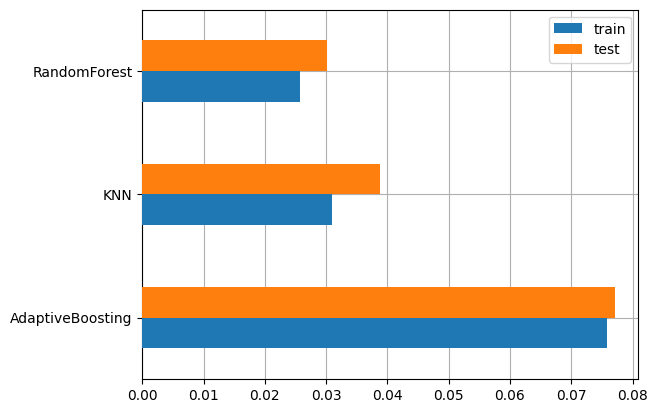

In [44]:
# plot
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, model Random Forest memiliki nilai error yang paling kecil sehingga model Random Forest akan dipilih sebagai model terbaik untuk diagnosa penyakit diabetes berdasarkan rekam medis pasien.

# Penutup

Model untuk diagnosa penyakit diabetes sudah dibuat dan model ini dapat dikembangkan lagi agar bisa digunakan atau dipasang di aplikasi dengan data sesungguhnya.

Pastinya dibutuhkan pengembangan dan penyempurnaan di model machine learning agar model lebih akurat dalam proses diagnosa.